# Spatio- Temporal segmentation task

21MIA1066

Vishali Sharma

# 1.Load Video:

Load the provided video file.

In [36]:
import cv2

def load_video(video_path):
    """Loads the video and returns the video capture object."""
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise Exception(f"Error: Unable to open video file {video_path}")
    return cap
video_path = '33871-398473585_small.mp4'  # Your video file path
cap = load_video(video_path)

# 2.Frame Extraction:

Extract individual frames from the video.

Total frames extracted: 628


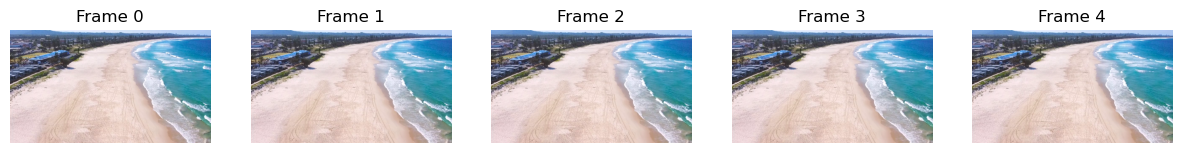

In [37]:
def extract_frames(cap, output_folder):
    """Extracts frames from the video and saves them to the output folder."""
    os.makedirs(output_folder, exist_ok=True)  # Create the output directory if it doesn't exist
    frames_output = []  # List to hold extracted frames
    frame_index = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Exit loop if no more frames

        # Save the frame to the output folder
        frame_filename = os.path.join(output_folder, f"frame_{frame_index:04d}.jpg")
        cv2.imwrite(frame_filename, frame)

        frames_output.append(frame)  # Store the frame for further processing
        frame_index += 1

    cap.release()  # Release the video capture
    print(f"Total frames extracted: {frame_index}")
    
    # Plot the first 5 frames, if available
    plot_first_five_frames(frames_output)

    return frames_output

def plot_first_five_frames(frames_output):
    """Plots the first five frames from the extracted frames."""
    num_frames_to_plot = min(5, len(frames_output))  # Ensure we don't exceed available frames

    plt.figure(figsize=(15, 5))
    for i in range(num_frames_to_plot):
        plt.subplot(1, 5, i + 1)
        plt.imshow(cv2.cvtColor(frames_output[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Frame {i}')
    
    plt.show()  # Show the plotted frames

# Example usage
# Assuming `cap` is your video capture object
output_folder = 'frames_output'  # Folder to save extracted frames
frames_output = extract_frames(cap, output_folder)


In [38]:
def convert_frames_to_hsv(frames_output, hsv_folder):
    """Converts frames to HSV color space and saves them."""
    os.makedirs(hsv_folder, exist_ok=True)  # Create directory for HSV frames
    hsv_frames = []

    # Convert each frame to HSV and save
    for i, frame in enumerate(frames_output):
        if frame is not None:  # Ensure the frame is valid
            hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            hsv_filename = os.path.join(hsv_folder, f'hsv_frame_{i:04d}.png')
            cv2.imwrite(hsv_filename, hsv_frame)
            hsv_frames.append(hsv_frame)

    return hsv_frames
hsv_folder = 'hsv_frames'  # Folder to save HSV frames
hsv_frames = convert_frames_to_hsv(frames_output, hsv_folder)


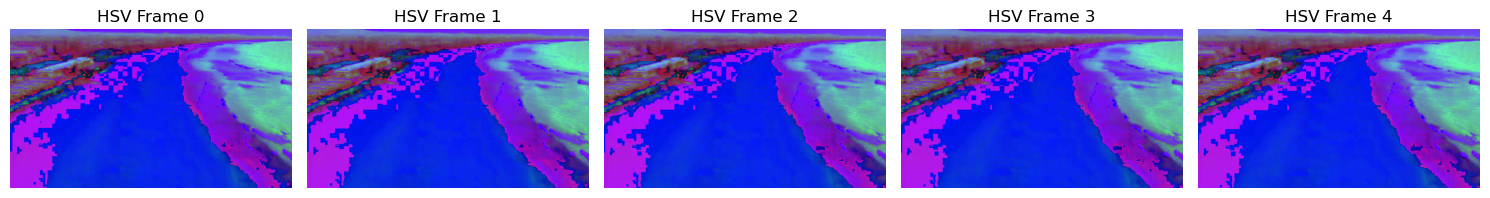

In [43]:
def display_hsv_frames(hsv_frames):
    """Displays the first few HSV frames as separate images using Matplotlib."""
    
    # Determine the number of frames to display (maximum of 5)
    num_frames_to_display = min(5, len(hsv_frames))

    # Create a figure to hold the subplots
    plt.figure(figsize=(15, 5))
    
    # Loop through each frame to plot
    for i in range(num_frames_to_display):
        plt.subplot(1, num_frames_to_display, i + 1)  # Create a subplot for each frame
        plt.imshow(hsv_frames[i], cmap='hsv')  # Display the HSV frame with the 'hsv' colormap
        plt.axis('off')  # Hide the axis
        plt.title(f'HSV Frame {i}')  # Title for each frame
        
    plt.tight_layout()  # Adjust the layout for better spacing
    plt.show()  # Show the plotted frames

# Example usage
# Assuming `hsv_frames` is your list of HSV frames
display_hsv_frames(hsv_frames)


# 3. Spatio-Temporal Segmentation:

Perform segmentation on each frame using a technique like color thresholding or edge detection.

Frame: hsv_frame_0000.png
  - Total Pixels: 518400
  - Edge Pixels: 40584
  - Color-Segmented Pixels: 42661


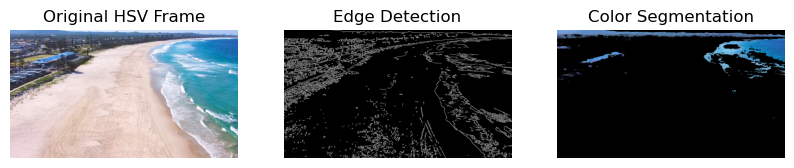

----------------------------------------
Frame: hsv_frame_0001.png
  - Total Pixels: 518400
  - Edge Pixels: 39116
  - Color-Segmented Pixels: 42971


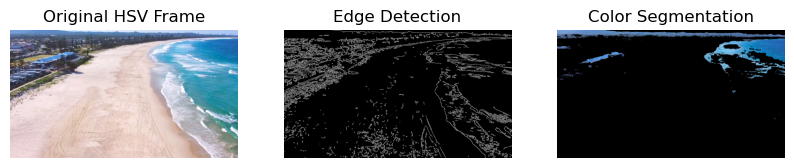

----------------------------------------
Frame: hsv_frame_0002.png
  - Total Pixels: 518400
  - Edge Pixels: 39479
  - Color-Segmented Pixels: 42664


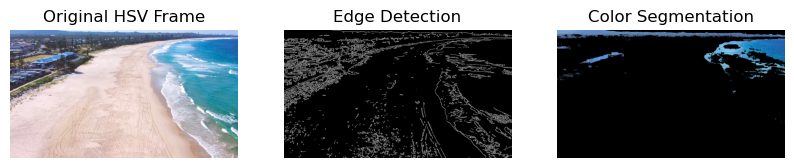

----------------------------------------
Frame: hsv_frame_0003.png
  - Total Pixels: 518400
  - Edge Pixels: 39456
  - Color-Segmented Pixels: 42623


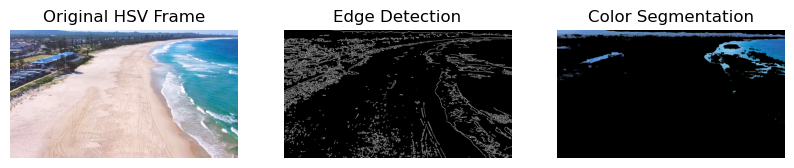

----------------------------------------
Segmentation complete!


In [50]:
def perform_segmentation_hsv(input_folder, edge_output_folder, color_output_folder):
    # Create output directories for edge detection and color segmentation
    os.makedirs(edge_output_folder, exist_ok=True)
    os.makedirs(color_output_folder, exist_ok=True)

    # Iterate through all extracted HSV frames
    frame_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]  # Assuming your HSV frames are .png files

    for idx, frame_file in enumerate(frame_files):
        frame_path = os.path.join(input_folder, frame_file)
        
        # Read the HSV frame image
        hsv_frame = cv2.imread(frame_path)

        # --- Edge Detection (Canny) ---
        # Convert the HSV frame to grayscale for edge detection
        # This step is necessary as Canny expects a single channel (grayscale) image
        gray_frame = cv2.cvtColor(hsv_frame, cv2.COLOR_HSV2BGR)  # Convert HSV to BGR to grayscale
        gray_frame = cv2.cvtColor(gray_frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray_frame, 100, 200)

        # Save the edge-detected image
        edge_filename = os.path.join(edge_output_folder, f"edge_{frame_file}")
        cv2.imwrite(edge_filename, edges)

        # --- Color Thresholding ---
        # Define lower and upper bounds for color segmentation in HSV
        lower_bound = np.array([100, 100, 100])  # Example lower bound in HSV
        upper_bound = np.array([140, 255, 255])  # Example upper bound in HSV

        # Create a mask for color segmentation in the HSV space
        mask = cv2.inRange(hsv_frame, lower_bound, upper_bound)

        # Apply the mask to get the segmented image
        segmented_color = cv2.bitwise_and(hsv_frame, hsv_frame, mask=mask)

        # Save the color-segmented image
        color_filename = os.path.join(color_output_folder, f"color_{frame_file}")
        cv2.imwrite(color_filename, segmented_color)

        # Calculate statistics for console output
        num_edges = np.count_nonzero(edges)
        num_segmented_pixels = np.count_nonzero(mask)
        total_pixels = hsv_frame.size // 3  # Each pixel has 3 channels (HSV)

        # Print statistics and display frames for the first few
        if idx < 4:  # Change to the desired number of frames
            print(f"Frame: {frame_file}")
            print(f"  - Total Pixels: {total_pixels}")
            print(f"  - Edge Pixels: {num_edges}")
            print(f"  - Color-Segmented Pixels: {num_segmented_pixels}")

            # Display the original and segmented images
            plt.figure(figsize=(10, 5))

            # Original HSV Frame
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(hsv_frame, cv2.COLOR_HSV2RGB))  # Convert to RGB for display
            plt.title('Original HSV Frame')
            plt.axis('off')

            # Edge-detected Frame
            plt.subplot(1, 3, 2)
            plt.imshow(edges, cmap='gray')
            plt.title('Edge Detection')
            plt.axis('off')

            # Color-segmented Frame (mask applied to HSV frame)
            plt.subplot(1, 3, 3)
            plt.imshow(cv2.cvtColor(segmented_color, cv2.COLOR_HSV2RGB))  # Convert to RGB for display
            plt.title('Color Segmentation')
            plt.axis('off')

            plt.show()
            print("-" * 40)

    print("Segmentation complete!")

# Example usage (without the main function)
input_folder = 'hsv_frames'  # Folder containing the extracted HSV frames
edge_output_folder = 'edge_output'  # Folder to save edge-detected frames
color_output_folder = 'color_output'  # Folder to save color-segmented frames

# Perform segmentation on each HSV frame
perform_segmentation_hsv(input_folder, edge_output_folder, color_output_folder)


# Track the segmented objects across frames to observe changes in motion and shape.

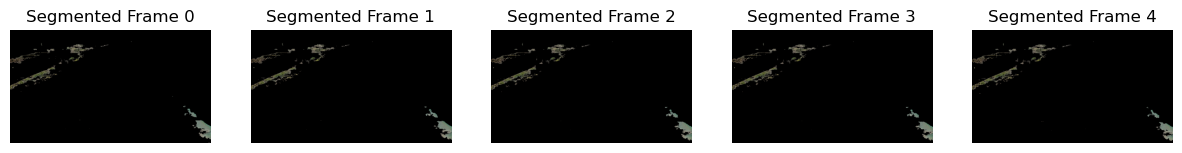

In [54]:
# Define color range for segmentation in HSV (modify according to your need)
lower_bound = np.array([10, 20, 30])
upper_bound = np.array([80, 155, 155])

segmented_folder = 'segmented_frames'
if not os.path.exists(segmented_folder):
    os.makedirs(segmented_folder)

segmented_frames = []

for i, hsv_frame in enumerate(hsv_frames):
    # Threshold the HSV image to get only selected colors
    mask = cv2.inRange(hsv_frame, lower_bound, upper_bound)
    segmented_frame = cv2.bitwise_and(frames_output[i], frames_output[i], mask=mask)
    segmented_filename = os.path.join(segmented_folder, f'segmented_frame_{i:04d}.png')
    cv2.imwrite(segmented_filename, segmented_frame)
    segmented_frames.append(segmented_frame)

# Plot the first 5 segmented frames
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(segmented_frames[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Segmented Frame {i}')
plt.show()


# Identify the regions that remain consistent over time (foreground vs. background segmentation).

In [56]:
# Function to perform foreground-background segmentation
def segment_foreground_background(input_folder, output_folder):
    # Create output directory for segmented frames and background
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of frame files
    frame_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.jpg')])

    # Create background subtractor
    back_sub = cv2.createBackgroundSubtractorMOG2()

    # Iterate through all extracted frames
    for idx, frame_file in enumerate(frame_files):
        frame_path = os.path.join(input_folder, frame_file)
        
        # Read the frame image
        frame = cv2.imread(frame_path)

        # Apply background subtraction
        fg_mask = back_sub.apply(frame)

        # Optional: Perform morphological operations to clean up the mask
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)

        # Save the segmented frame to output folder
        segmented_filename = os.path.join(output_folder, f"segmented_{frame_file}")
        cv2.imwrite(segmented_filename, fg_mask)

        # Get the background image from the background subtractor
        background = back_sub.getBackgroundImage()
        if background is None:  # If the background image is not ready
            background = np.zeros_like(frame)  # Create a blank background if not available

        # Display pixel values of the frame, foreground mask, and background image for the first five frames
        if idx < 5:
            print(f"Segmented frame saved: {segmented_filename}")
            print("Frame Pixel Values:")
            print(frame)
            print("Foreground Mask Pixel Values:")
            print(fg_mask)
            print("Background Pixel Values:")
            print(background)
            print("\n" + "-"*50 + "\n")

        # Wait for 100 ms to move to the next frame
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()
    print("Foreground and background segmentation complete!")

# Main Code to Run
if __name__ == "__main__":
    input_folder = 'frames_output'  # Folder containing color-segmented frames
    output_folder = 'segmented_output'  # Folder to save segmented frames

    # Perform foreground-background segmentation across frames
    segment_foreground_background(input_folder, output_folder)


Segmented frame saved: segmented_output\segmented_frame_0000.jpg
Frame Pixel Values:
[[[226 173 130]
  [226 173 130]
  [224 171 128]
  ...
  [238 198 173]
  [238 198 173]
  [238 198 173]]

 [[219 166 123]
  [219 166 123]
  [221 168 125]
  ...
  [238 198 173]
  [238 198 173]
  [238 198 173]]

 [[216 163 120]
  [215 162 119]
  [218 165 122]
  ...
  [238 198 173]
  [238 198 173]
  [238 198 173]]

 ...

 [[224 221 243]
  [227 224 246]
  [219 216 238]
  ...
  [143 152 155]
  [143 153 153]
  [137 147 147]]

 [[225 222 244]
  [227 224 246]
  [219 216 238]
  ...
  [150 159 162]
  [153 163 163]
  [147 159 159]]

 [[224 221 243]
  [227 224 246]
  [219 216 238]
  ...
  [153 162 165]
  [157 169 169]
  [156 168 168]]]
Foreground Mask Pixel Values:
[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]
Background Pixel Values:
[[[226 173 130]
  [226 173 130]
  [224

# 4.Scene Cut Detection:

Use pixel-based comparison or histogram differences between consecutive frames to detect abrupt changes (hard cuts).

Detect gradual scene transitions (Soft cuts) by analyzing frame-to-frame intensity changes over time.

In [63]:
import os
import cv2

# Create directories for histograms, hard cuts, and soft cuts if they don't exist
hist_folder = 'histograms'
hard_cut_folder = 'hard_cuts'
soft_cut_folder = 'soft_cuts'

for folder in [hist_folder, hard_cut_folder, soft_cut_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

similarity_scores = []
threshold_hard_cut = 0.5  # Adjust this threshold for hard cuts
soft_cut_threshold = 0.8    # Adjust this for soft cuts

hard_cuts = []
soft_cuts = []

# Function to calculate histogram similarity
def calculate_histogram_similarity(frame1, frame2):
    # Calculate histograms
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    
    # Normalize histograms
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    
    # Calculate correlation similarity (0 to 1)
    score = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return score

# Compare consecutive frames for cuts
for i in range(1, len(frames_output)):
    similarity = calculate_histogram_similarity(frames_output[i-1], frames_output[i])
    similarity_scores.append(similarity)

    # Save histograms
    hist_filename = os.path.join(hist_folder, f'hist_{i:04d}.png')
    hist_img = cv2.calcHist([frames_output[i]], [0], None, [256], [0, 256])
    hist_img = cv2.normalize(hist_img, hist_img).astype('uint8')
    cv2.imwrite(hist_filename, hist_img)

    # Hard Cut Detection
    if similarity < threshold_hard_cut:
        hard_cuts.append(i)
        hard_cut_filename = os.path.join(hard_cut_folder, f'hard_cut_{i:04d}.png')
        cv2.imwrite(hard_cut_filename, frames_output[i])

    # Soft Cut Detection
    elif threshold_hard_cut <= similarity <= soft_cut_threshold:
        soft_cuts.append(i)
        soft_cut_filename = os.path.join(soft_cut_folder, f'soft_cut_{i:04d}.png')
        cv2.imwrite(soft_cut_filename, frames_output[i])

# Display similarity scores for all frames
for i in range(len(similarity_scores)):
    print(f"Frame {i+1} vs Frame {i+2} Similarity Score: {similarity_scores[i]:.4f}")

# Print total counts of cuts
print(f"Total Hard Cuts Detected: {len(hard_cuts)}")
print(f"Total Soft Cuts Detected: {len(soft_cuts)}")

Frame 1 vs Frame 2 Similarity Score: 0.9996
Frame 2 vs Frame 3 Similarity Score: 0.9997
Frame 3 vs Frame 4 Similarity Score: 1.0000
Frame 4 vs Frame 5 Similarity Score: 0.9997
Frame 5 vs Frame 6 Similarity Score: 0.9994
Frame 6 vs Frame 7 Similarity Score: 0.9995
Frame 7 vs Frame 8 Similarity Score: 0.9996
Frame 8 vs Frame 9 Similarity Score: 0.9995
Frame 9 vs Frame 10 Similarity Score: 0.9999
Frame 10 vs Frame 11 Similarity Score: 0.9994
Frame 11 vs Frame 12 Similarity Score: 0.9996
Frame 12 vs Frame 13 Similarity Score: 0.9995
Frame 13 vs Frame 14 Similarity Score: 0.9995
Frame 14 vs Frame 15 Similarity Score: 0.9996
Frame 15 vs Frame 16 Similarity Score: 0.9998
Frame 16 vs Frame 17 Similarity Score: 0.9993
Frame 17 vs Frame 18 Similarity Score: 0.9995
Frame 18 vs Frame 19 Similarity Score: 0.9995
Frame 19 vs Frame 20 Similarity Score: 0.9996
Frame 20 vs Frame 21 Similarity Score: 0.9996
Frame 21 vs Frame 22 Similarity Score: 1.0000
Frame 22 vs Frame 23 Similarity Score: 0.9997
Frame

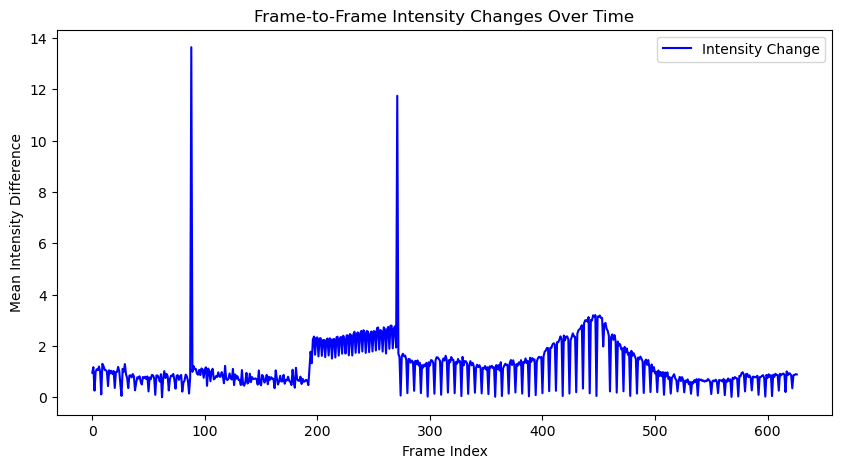


Soft Cut Detection Complete.
Detected Soft Cuts:


In [10]:
def calculate_intensity_change(frame1, frame2):
    """Calculates the mean absolute intensity difference between two frames."""
    gray_frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray_frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(gray_frame1, gray_frame2)
    mean_diff = np.mean(diff)
    return mean_diff

def visualize_intensity_changes(intensity_changes):
    """Plots the intensity changes over time."""
    plt.figure(figsize=(10, 5))
    plt.plot(intensity_changes, color='blue', label='Intensity Change')
    plt.xlabel('Frame Index')
    plt.ylabel('Mean Intensity Difference')
    plt.title('Frame-to-Frame Intensity Changes Over Time')
    plt.legend()
    plt.show()

def detect_soft_cuts(input_folder, window_size=5, threshold=15):
    """Detects soft cuts in a sequence of frames."""
    frame_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.jpg')])
    intensity_changes = []
    soft_cuts = []

    # Read the initial frame to start
    previous_frame = cv2.imread(os.path.join(input_folder, frame_files[0]))

    # Calculate intensity changes for consecutive frames
    for idx in range(1, len(frame_files)):
        frame_path = os.path.join(input_folder, frame_files[idx])
        current_frame = cv2.imread(frame_path)

        # Calculate the mean intensity difference between consecutive frames
        intensity_change = calculate_intensity_change(previous_frame, current_frame)
        intensity_changes.append(intensity_change)

        # Update the previous frame for the next iteration
        previous_frame = current_frame

    # Visualize the intensity changes
    visualize_intensity_changes(intensity_changes)

    # Detect soft cuts using a sliding window approach
    for idx in range(len(intensity_changes) - window_size):
        # Calculate the average intensity change over the window
        window_average = np.mean(intensity_changes[idx:idx + window_size])

        # If the window average is above the threshold, it indicates a soft cut
        if window_average > threshold:
            soft_cuts.append((idx + window_size, frame_files[idx + window_size]))
            print(f"Soft cut detected at frame {idx + window_size}: {frame_files[idx + window_size]} (Window Avg: {window_average:.2f})")

    print("\nSoft Cut Detection Complete.")
    return soft_cuts

# Main Code to Run
if __name__ == "__main__":
    input_folder = 'color_output'  # Folder containing color-segmented frames
    window_size = 5  # Number of frames to average over for detecting soft cuts
    threshold = 15   # Threshold for detecting soft cuts (tune this value as needed)

    # Detect soft cuts based on frame-to-frame intensity changes
    soft_cuts = detect_soft_cuts(input_folder, window_size, threshold)

    # Print all detected soft cuts
    print("Detected Soft Cuts:")
    for idx, frame_name in soft_cuts:
        print(f"Frame {idx}: {frame_name}")


# 5. Mark Scene Cuts:

Highlight the frames where scene cuts are detected.

Create a summary displaying the detected scene boundaries.

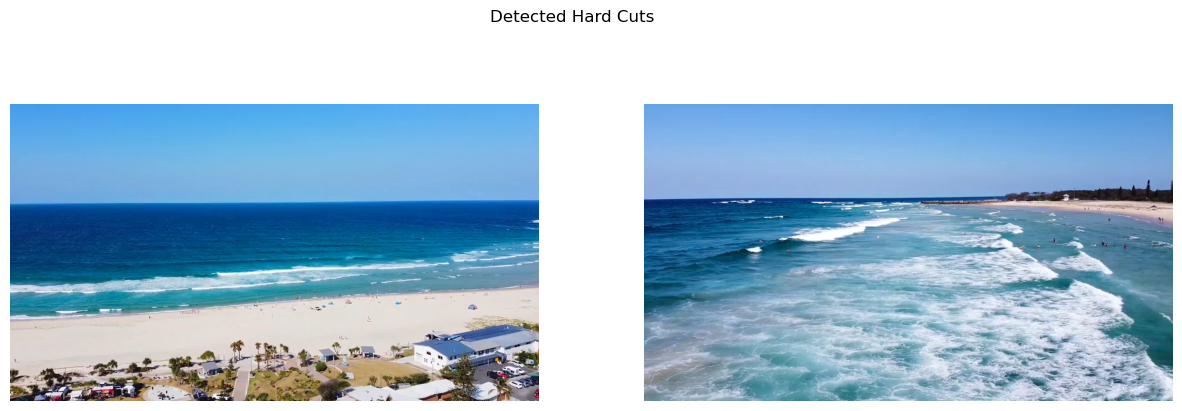

<Figure size 1500x500 with 0 Axes>

In [64]:
# Result Visualization
# Function to display frames
def display_frames(frames, title):
    plt.figure(figsize=(15, 5))
    for i, frame in enumerate(frames):
        plt.subplot(1, len(frames), i + 1)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display detected hard and soft cuts
hard_cut_frames = [frames_output[i] for i in hard_cuts]
soft_cut_frames = [frames_output[i] for i in soft_cuts]

display_frames(hard_cut_frames, "Detected Hard Cuts")
display_frames(soft_cut_frames, "Detected Soft Cuts")

# 6. Result Visualization:

Display frames where scene cuts are identified and show segmentation results for selected frames.


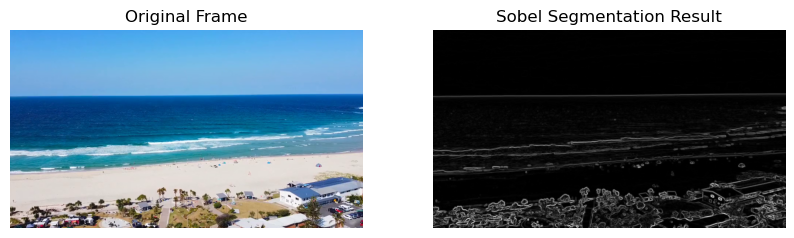

In [66]:
# Optional: Apply Sobel segmentation and display results for selected frames (e.g., first hard cut)
def sobel_segmentation(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
    return sobel_magnitude

# Visualize segmentation results for the first hard cut
if hard_cuts:
    selected_frame_index = hard_cuts[0]
    segmented_frame = sobel_segmentation(frames_output[selected_frame_index])
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frames_output[selected_frame_index], cv2.COLOR_BGR2RGB))
    plt.title("Original Frame")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_frame, cmap='gray')
    plt.title("Sobel Segmentation Result")
    plt.axis('off')
    plt.show()
